In [ ]:
# Import common libraries used during the computation
import os
import numpy as np
import nibabel as nib # nibabel library
import pandas as pd # panda library
import matplotlib as mpl # plotting library
import matplotlib.pyplot as plt # plotting library
# Import Nilearn library
from nilearn.glm import first_level
from nilearn.plotting import plot_design_matrix, plot_contrast_matrix, plot_stat_map
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix
from nilearn.glm import threshold_stats_img
from nilearn.image import mean_img

In [ ]:
# Show difference between Glover and SPM HRF
time_length = 30

glover_timecourse = first_level.glover_hrf(1, oversampling=50, time_length=time_length)
spm_timecourse = first_level.spm_hrf(1, oversampling=50, time_length=time_length)

sample_times = np.linspace(0, time_length, num=len(glover_timecourse))

plt.plot(sample_times, glover_timecourse, label="Glover")
plt.plot(sample_times, spm_timecourse, label="SPM")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (AU)")
plt.legend()

In [ ]:
# How to compute the Regressors

#Define some functions
def generate_stim(onset, amplitude, duration, hrf_model, maxtime=30):
    # Generate signal with specified duration and onset
    frame_times = np.linspace(0, maxtime, 601)
    exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)
    stim = np.zeros_like(frame_times)
    stim[(frame_times > onset) * (frame_times <= onset + duration)] = amplitude

    signal, name = first_level.compute_regressor(
        exp_condition, hrf_model, frame_times, con_id="main", oversampling=16
    )

    return frame_times, stim, signal


def plot_regressor(onset, amplitude, duration, hrf_model):
    frame_times, stim, signal = generate_stim(onset, amplitude, duration, hrf_model)
    plt.fill(frame_times, stim, "k", alpha=0.5, label="stimulus")
    plt.plot(frame_times, signal.T[0], label="Regressor")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (AU)")
    plt.legend(loc=1)
    plt.title(hrf_model)
    return None


# Generate an event of 1 second duration starting at time 0
# You could use one of the following HRFs:
# spm, spm + derivative, spm + derivative + dispersion, fir, 
# glover, glover + derivative, glover + derivative + dispersion

hrf_model = "spm"
onset, amplitude, duration = 0.0, 1.0, 1.0
plot_regressor(onset, amplitude, duration, hrf_model)

In [ ]:
# TO-DO
# Now change the duration of the stimulus up to 20 s

In Statistical Parametric Mapping (SPM), time and dispersion derivatives are used in fMRI analysis to improve the modeling of the hemodynamic response function (HRF). Their main purpose is to account for variations in the timing and shape of the HRF across different brain regions and subjects.

1. Time Derivative
Captures small variations in the onset of the hemodynamic response.
Useful when there is temporal jitter (slight shifts in timing) between stimulus presentation and the actual BOLD response.
Mathematically, it is the first derivative of the canonical HRF.
Improves model fit without increasing the number of regressors too much.

3. Dispersion Derivative
Captures variations in the duration or width of the HRF.
Useful when the shape of the HRF deviates from the canonical model due to vascular differences or neural adaptation.
Mathematically, it is the second derivative of the canonical HRF.
Helps account for differences in BOLD response duration across brain regions.


When to Use Them?
If you suspect variability in HRF timing, include the time derivative.
If you expect variations in HRF shape, include both time and dispersion derivatives.
They allow for a more flexible and robust GLM analysis in SPM, reducing misalignment effects.

In [ ]:
#TO-DO
# Compare the different HRFs in SPM by overlaying them
# If you need more information, check out this webpage https://nilearn.github.io/dev/modules/glm.html


spm_time = first_level.spm_time_derivative(1, oversampling=50, time_length=time_length)
spm_dispers = first_level.spm_dispersion_derivative(1, oversampling=50, time_length=time_length)
spm_canonical = first_level.spm_hrf(1, oversampling=50, time_length=time_length)

sample_times = np.linspace(0, time_length, num=len(glover_timecourse))
plt.plot(sample_times, spm_timecourse, label="SPM")
plt.plot(sample_times, spm_time, label="Time Derivative")
plt.plot(sample_times, spm_dispers, label="Dispersion Derivative")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (AU)")
plt.legend()

In [ ]:
# Here we plot multiple durations together to see how the resulting regressor varies
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=40)

for n in [1, 3, 5, 10, 15, 20, 25, 30, 35]:
    frame_times, stim, signal = generate_stim(
        onset, amplitude, n, hrf_model, maxtime=50
    )
    axes.plot(frame_times, signal.T[0], label="Regressor", c=cmap(norm(n)))

axes.set_xlabel("Time (s)")
axes.set_ylabel("Amplitude (AU)")
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes)

In [ ]:
# What conclusion can we draw about the HRF duration after examining this plot?

It is time to plot the HRF of a real finger tapping experiment.

A finger-tapping experiment is a commonly used motor task in neuroscience and cognitive research, particularly in functional MRI (fMRI) and EEG studies, to investigate motor control, brain activation, and neuroplasticity.

Overview of the Experiment:
Participants are instructed to tap their fingers in a specific sequence or rhythm (e.g., alternating between index and middle fingers).
The task is often performed under different conditions: self-paced, externally cued (e.g., metronome-paced), or involving different hand movements.
Brain activity is recorded, typically using fMRI to assess activation in motor-related regions (e.g., the primary motor cortex (M1), premotor cortex, supplementary motor area (SMA), and cerebellum).
Purpose:
To study motor system function and connectivity.
To investigate plasticity in patients with neurological disorders (e.g., Parkinson’s disease, stroke recovery).
To assess brain lateralization in motor tasks.


Scientific Reference:
Biswal, B., Yetkin, F. Z., Haughton, V. M., & Hyde, J. S. (1995). Functional connectivity in the motor cortex of resting human brain using echo-planar MRI. Magnetic Resonance in Medicine, 34(4), 537-541. https://doi.org/10.1002/mrm.1910340409

This study is significant because it introduced resting-state functional connectivity, using a finger-tapping task to demonstrate correlations between different motor regions.

Our experiment lasts 400 s
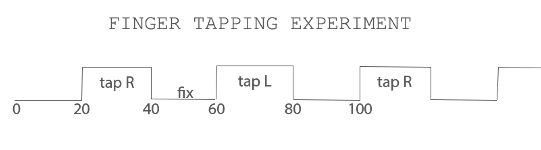

In [ ]:
# TO-DO
# Plot the hrf of the finger tapping right, left and baseline separately or superimposed
# Consider the duration of the stimulus


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=40)

for onset in [20, 100, 180, 260, 340]:
    frame_times, stim, signal = generate_stim(
        onset, amplitude, 20, hrf_model, maxtime=400
    )
    axes.plot(frame_times, signal.T[0], label="Regressor", c=cmap(norm(n)))

axes.set_xlabel("Time (s)")
axes.set_ylabel("Amplitude (AU)")
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes)

In [ ]:
# Some Imports
from nilearn.glm.first_level.hemodynamic_models import spm_hrf
from scipy.stats import pearsonr

In [ ]:
np.random.seed(2)

N = 400 # Total Experiment length in s
dg_hrf = spm_hrf(t_r=2, oversampling=1) # TR = 2


# Definition of the Regressors in the Block Design
# Finger tapping Right
blocked_pred1_onsets = list(range(20, 40)) + list(range(100, 120)) + list(range(180, 200)) + list(range(260, 280)) \
+ list(range(340, 360))   

# Finger tapping Left
blocked_pred2_onsets = list(range(60, 80)) + list(range(140, 160)) + list(range(220, 240)) + list(range(300, 320)) \
+ list(range(380, 400))

# Finger tapping Baseline
blocked_pred3_onsets = list(range(0, 20)) + list(range(40, 60)) + list(range(80, 100)) + list(range(120, 140))\
+ list(range(160, 180)) + list(range(200, 220)) + list(range(240, 260)) + list(range(280, 300)) \
+ list(range(320, 340)) + list(range(360, 380))   #Baseline

# Fill the regressors with ones (according to the experiment timing)
N_stim = len(blocked_pred1_onsets)
blocked_pred1, blocked_pred2, blocked_pred3 = np.zeros(N), np.zeros(N), np.zeros(N)
blocked_pred1[blocked_pred1_onsets] = 1
blocked_pred2[blocked_pred2_onsets] = 1
blocked_pred3[blocked_pred3_onsets] = 1

#Define the Design Matrix X (by convolving the Regressors with the SPM-HRF)
icept = np.ones((N, 1))
X_blocked = np.hstack((
    np.convolve(blocked_pred1, dg_hrf)[:N, np.newaxis],
    np.convolve(blocked_pred2, dg_hrf)[:N, np.newaxis],
    np.convolve(blocked_pred3, dg_hrf)[:N, np.newaxis],
     icept
))

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title("Blocked events (red = right, blue = left) without baseline (for clarity)", fontsize=20)
plt.xlim(0, N)
plt.axhline(0, c='tab:blue')
plt.grid()

for onset in blocked_pred1_onsets:
    plt.plot((onset, onset), (0, 1), c='tab:red') # Right

for onset in blocked_pred2_onsets:
    plt.plot((onset, onset), (0, 1), c='tab:blue') # Left
    
''' # We avoid plotting also the baseline         
for onset in blocked_pred3_onsets:
    plt.plot((onset, onset), (0, 1), c='tab:green') # Baseline
'''

plt.subplot(2, 2, 3)
plt.xlim(0, N)
plt.title("Convolved predictors (BLOCKED) with baseline (green)", fontsize=20)
plt.ylim(-1, 2)
plt.plot(X_blocked[:, 0], c='tab:red')
plt.plot(X_blocked[:, 1], c='tab:blue')
plt.plot(X_blocked[:, 2], c='tab:green')
plt.grid()
plt.xlabel("Time (volumes)", fontsize=15)

# Event-Related Design code------------------------------------------------
er_stims = np.arange(N)
er_pred1_onsets = np.random.choice(er_stims, N_stim, replace=False)
er_stims_new = np.array([o for o in er_stims if o not in er_pred1_onsets])
er_pred2_onsets = np.random.choice(er_stims_new, N_stim, replace=False)
er_pred1, er_pred2 = np.zeros(N), np.zeros(N)
er_pred1[er_pred1_onsets] = 1
er_pred2[er_pred2_onsets] = 1

plt.subplot(2, 2, 2)
plt.xlim(0, N)
plt.title("Event onsets (EVENT-RELATED)", fontsize=20)
plt.axhline(0, c='tab:blue')
plt.grid()

for onset in er_pred1_onsets:
    plt.plot((onset, onset), (0, 1), c='tab:blue')

for onset in er_pred2_onsets:
    plt.plot((onset, onset), (0, 1), c='tab:orange')

X_er = np.hstack((
    icept,
    np.convolve(er_pred1, dg_hrf)[:N, np.newaxis],
    np.convolve(er_pred2, dg_hrf)[:N, np.newaxis]
))

plt.subplot(2, 2, 4)

plt.title("Convolved predictors (EVENT-RELATED)", fontsize=20)
plt.ylim(-1, 2)
plt.plot(X_er[:, 1], c='tab:blue')
plt.plot(X_er[:, 2], c='tab:orange')
plt.axhline(0, ls='--', c='k')
plt.xlim(0, N)
plt.grid()
plt.xlabel("Time (volumes)", fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# It is time to calculate the correlation and to compare them (Block vs Event)
corr_blocked = pearsonr(X_blocked[:, 0], X_blocked[:, 1])
corr_er = pearsonr(X_er[:, 1], X_er[:, 2])
print("Correlation blocked: %.3f. Correlation event-related: %.3f" % (corr_blocked[0], corr_er[0]))

In [ ]:
# TO-DO
# Calculate the correlation between the baseline and the left/right regressors
rb = pearsonr(X_blocked[:, 0], X_blocked[:, 2])
lb = pearsonr(X_blocked[:, 1], X_blocked[:, 2])
print("Correlation blocked right vs baseline: %.3f. Correlation blocked left vs baseline: %.3f" % (rb[0], lb[0]))

In [ ]:
# What about the design efficiency?

In [ ]:
# Define the Contrast
cvec = np.array([1, 0, 0, 0])

In [ ]:
# efficiency = 1.0 / c @ inv(X.T @ X) @ c.T
eff = 1.0 / cvec.dot(np.linalg.inv(X_blocked.T.dot(X_blocked))).dot(cvec.T)
print("Efficiency: %.3f" % (eff))

In [ ]:
# TO-DO
# Calculate the Efficiency of the ER Design Matrix

In [ ]:
# Inspect the Rigid Body Motion file (rp_**)

# Load the motion file
rigib_body_file = 'sub-01/func/rp_sub-01_task-ft_run-1_bold.txt'
motion_params = np.loadtxt(rigib_body_file)
rotation_params = motion_params[:, :3]
translation_params = motion_params[:, 3:]
# Plot
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.title('Rotation', fontsize=25)
plt.plot(rotation_params)
plt.xlim(0, motion_params.shape[0])
plt.legend(['x', 'y', 'z'], fontsize=15)
plt.ylabel('Rotation in radians', fontsize=15)
plt.grid()

plt.subplot(2, 1, 2)
plt.title('Translation', fontsize=25)
plt.plot(translation_params)
plt.legend(['x', 'y', 'z'], fontsize=15)
plt.ylabel('Translation in mm', fontsize=15)
plt.xlim(0, motion_params.shape[0])
plt.xlabel('Time (TR)', fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Prepare the Design Matrix

# Load the pre-processed data
fmri_file = 'sub-01/func/swarsub-01_task-ft_run-1_bold.nii.gz'
f_img = nib.load(fmri_file)
# Get the data
f_img_data = f_img.get_fdata()

# Load the structural data
# fmri = 'sub-01/func/meansub-01_task-ft_run-1_bold.nii'
# s_img = nib.load(fmri)

m_img = mean_img(f_img, copy_header=True)


t_r = 2
n_scans = 200
frame_times = np.arange(n_scans) * t_r
# these are the types of the different trials
conditions = ["B", "R", "B", "L", "B", "R", "B", "L", "B", "R", "B", "L", "B", "R", "B", "L", "B", "R", "B", "L"]
duration = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
# these are the corresponding onset times
onsets = [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0, 260.0, 280.0, 300.0, 320.0, 340.0, 360.0, 380.0]
# Next, we simulate 6 motion parameters jointly observed with fMRI acquisitions
motion = motion_params
# The 6 parameters correspond to three translations and three
# rotations describing rigid body motion
add_reg_names = ["tx", "ty", "tz", "rx", "ry", "rz"]


events = pd.DataFrame({"trial_type": conditions, "onset": onsets, "duration": duration})

# We include three drift regressors. Their aim is to remove signal components unrelated to the expected neural response.

X1 = make_first_level_design_matrix(
    frame_times, events, drift_model='polynomial', drift_order=3,
    add_regs=motion, add_reg_names=add_reg_names, hrf_model=hrf_model)



In [ ]:
plot_design_matrix(X1)

In [ ]:
fmri_glm = FirstLevelModel(
    smoothing_fwhm=5,
    minimize_memory=True,
)

In [ ]:
fmri_glm = fmri_glm.fit(fmri_file, design_matrices=X1)

In [ ]:
n_regressors = X1.shape[1]
activation = np.zeros(n_regressors)
activation[1] = 1
activation[2] = -1

In [ ]:
plot_contrast_matrix(contrast_def=activation, design_matrix=X1)

In [ ]:
eff_map = fmri_glm.compute_contrast(activation, output_type="effect_size")

In [ ]:
t_map = fmri_glm.compute_contrast(activation, stat_type = "t", output_type="stat")
#z_map = fmri_glm.compute_contrast(activation, output_type="z_score")

In [ ]:
cut_coords = [42, 40, 21]
plotting_config = {
    "bg_img": m_img,
    "display_mode": "z", #Axial
    "cut_coords": cut_coords,
    "black_bg": True,
}
plot_stat_map(
    t_map,
    threshold=3,
    title="right > left (|t|>5)",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)

In [ ]:
clean_map, threshold = threshold_stats_img(
    t_map, alpha=0.05, height_control="fdr", two_sided=False
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        f"right > rest (p<0.05 FDR-corrected; threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)